In [1]:
from data_tools import *
import rasterio
from rasterio.plot import show_hist
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_dir = '/home/jovyan/data/planet_flat'

In [4]:
%%capture
tif_fns=fn_list(img_dir, "*.tif")

In [5]:
tif_fns[0]

'/home/jovyan/data/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

In [6]:
first, first_ndv = read_raster(tif_fns[0])

In [7]:
print(first[-1, -1])

0


In [8]:
#arr_list=[read_raster(fn)[0] for fn in tif_fns]

In [9]:
raster_file = tif_fns[0]
raster_arr = read_raster(raster_file)[0]

In [10]:
raster_file

'/home/jovyan/data/planet_flat/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

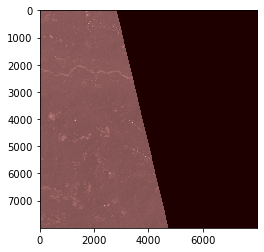

In [11]:
raster = rasterio.open(raster_file)
plt.imshow(raster.read(1), cmap='pink')
plt.show()

In [12]:
raster_arr

array([[4236, 4244, 4174, ...,    0,    0,    0],
       [4318, 4248, 4202, ...,    0,    0,    0],
       [4253, 4199, 4162, ...,    0,    0,    0],
       ...,
       [4092, 4039, 3976, ...,    0,    0,    0],
       [4084, 4072, 4107, ...,    0,    0,    0],
       [4021, 4066, 4119, ...,    0,    0,    0]], dtype=uint16)

In [14]:
raster.count

4

In [15]:
band_one = raster.read(1)

In [16]:
band_two = raster.read(2)

In [17]:
band_three = raster.read(3)

In [18]:
band_four = raster.read(4)

In [19]:
band_one = band_one.astype('float')
band_one[band_one == 0] = np.nan
band_one = band_one[~np.isnan(band_one)]

band_two = band_two.astype('float')
band_two[band_two == 0] = np.nan
band_two = band_two[~np.isnan(band_two)]


band_three = band_three.astype('float')
band_three[band_three == 0] = np.nan
band_three = band_three[~np.isnan(band_three)]


band_four = band_four.astype('float')
band_four[band_four == 0] = np.nan
band_four = band_four[~np.isnan(band_four)]

In [20]:
band_one

array([4236., 4244., 4174., ..., 3756., 3690., 3651.])

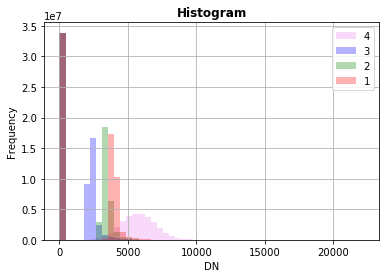

In [57]:
show_hist(raster,
          bins=50, lw=0.0, stacked=False, alpha=0.3,
          histtype='stepfilled', title="Histogram")

(array([1.921400e+04, 2.766000e+04, 7.431600e+04, 1.562340e+05,
        2.829510e+05, 4.749040e+05, 7.459830e+05, 1.115184e+06,
        1.535214e+06, 1.969869e+06, 2.375025e+06, 2.668008e+06,
        2.806121e+06, 2.823419e+06, 2.688764e+06, 2.445558e+06,
        2.129788e+06, 1.732953e+06, 1.295684e+06, 9.153370e+05,
        6.242190e+05, 4.175950e+05, 2.779470e+05, 1.854000e+05,
        1.208870e+05, 8.103000e+04, 5.290800e+04, 3.389000e+04,
        2.092900e+04, 1.198900e+04, 6.652000e+03, 3.891000e+03,
        2.094000e+03, 9.690000e+02, 3.960000e+02, 1.370000e+02,
        5.500000e+01, 2.100000e+01, 4.000000e+00, 1.000000e+00,
        2.000000e+00, 2.000000e+00, 1.000000e+00, 2.000000e+00,
        1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([ 1848.  ,  2142.92,  2437.84,  2732.76,  3027.68,  3322.6 ,
         3617.52,  3912.44,  4207.36,  4502.28,  4797.2 ,  5092.12,
         5387.04,  5681.96,  5976.88,  6271.8 ,  6566.72, 

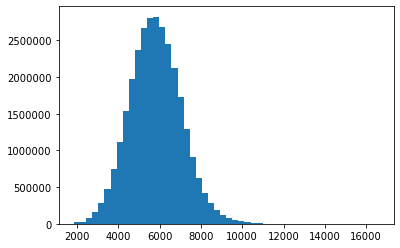

In [27]:
plt.hist(band_four, bins=50)